## Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image
import requests

In [3]:
from flask_app.commons import util

In [4]:
%load_ext autoreload
%autoreload 2

## Sample Images

In [5]:
source = Image.open('../assets/representative/celeba_hq/src/female/039913.jpg')
ref = Image.open('../assets/representative/celeba_hq/ref/female/015248.jpg')

In [6]:
# resize to 256x256
source = source.resize((256,256))
ref = ref.resize((256,256))

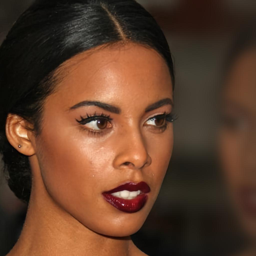

In [7]:
source

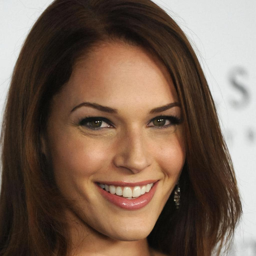

In [8]:
ref

## Calling Flask app

In [9]:
URL = "http://10.2.117.32:5000/predict"

### Without Face Alignment

In [59]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'female'
}

In [60]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 366 µs, sys: 4.79 ms, total: 5.16 ms
Wall time: 83.2 ms


In [61]:
response_json = response.json()

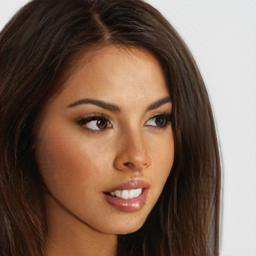

In [62]:
util.base64_to_image(response_json['output_img'])

### With Face Alignment

In [66]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'female',
    'align_face': True
}

In [69]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.06 ms, sys: 166 µs, total: 5.23 ms
Wall time: 203 ms


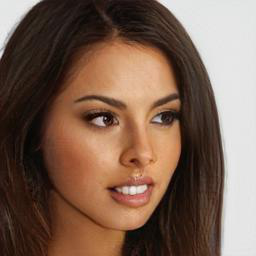

In [70]:
response_json = response.json()
util.base64_to_image(response_json['output_img'])

## Another Example

In [79]:
source = Image.open('../assets/representative/custom/male/custom_male.jpg').resize((256,256))
ref = Image.open('../assets/representative/celeba_hq/ref/male/012712.jpg').resize((256,256))

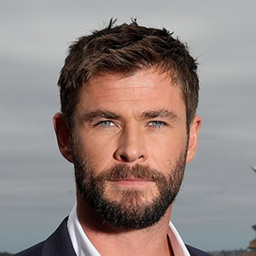

In [80]:
source

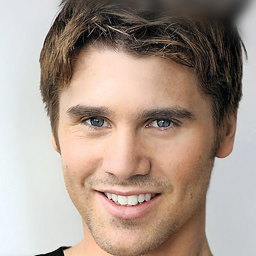

In [81]:
ref

In [82]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male',
    'align_face': False
}

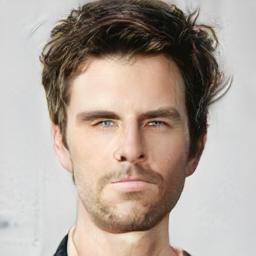

In [83]:
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])

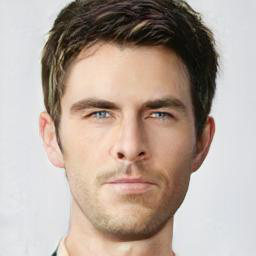

In [84]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male',
    'align_face': True
}
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])

## Another Example (w/o) resizing

In [85]:
source = Image.open('../assets/representative/celeba_hq/src/female/051340.jpg')
ref = Image.open('../assets/representative/celeba_hq/ref/male/012712.jpg')

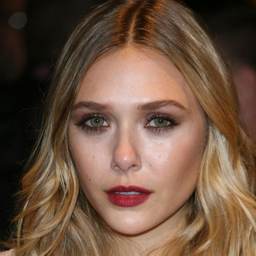

In [86]:
source.resize((256,256))

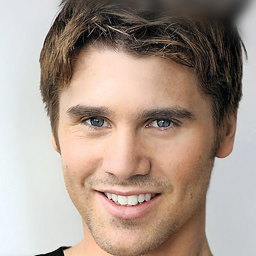

In [87]:
ref.resize((256,256))

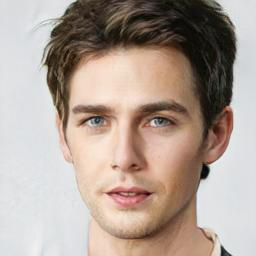

In [90]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male',
    'align_face': False
}
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])

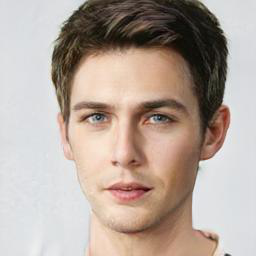

In [91]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male',
    'align_face': True
}
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])

## Both using custom images

In [112]:
source = Image.open('../assets/representative/custom/female/custom_female.jpg').resize((256,256))
ref = Image.open('../assets/representative/custom/male/custom_male.jpg').resize((256,256))

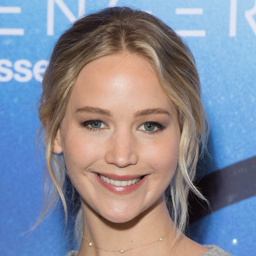

In [113]:
source

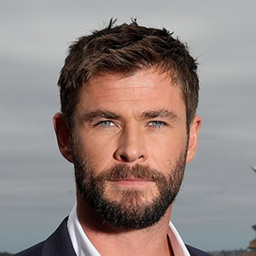

In [114]:
ref

In [115]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male',
    'align_face': False
}

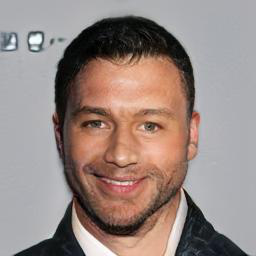

In [116]:
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])

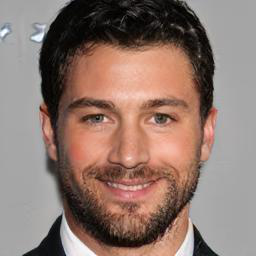

In [117]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref),
    'ref_class': 'male',
    'align_face': True
}
response = requests.post(URL, json=payload)
response_json = response.json()
util.base64_to_image(response_json['output_img'])